# Analyse data-centric pour une agence immobilière

>Une société immobilière souhaiterait récupérer et stocker des données Open Data des ventes immobilières afin de mener une étude lui permettant d'avoir une meilleure connaissance du marché en utilisant l'IA dans un futur proche. En amont de cela, elle souhaiterait donc pouvoir créer un flux permettant le stockage de données mais aussi des analyses de l'historique>
.

## Nettoyage des données

### Affichage de base

In [314]:
import pandas as pd

In [315]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [316]:
# Documentation à prendre sur : https://www.data.gouv.fr/fr/datasets/5c4ae55a634f4117716d5656/#/resources/87038926-fb31-4959-b2ae-7a24321c599a
immo = pd.read_csv('valeursfoncieres-2022.txt', sep='|')
display(immo)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\602733101.py:1: DtypeWarning:

Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.



,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"55000,00",13.0,NaN,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,102,NaN,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,1,398,NaN,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,"143000,00",98.0,NaN,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,1,398,NaN,ZE,187,NaN,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,1,243,NaN,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"188100,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,210.0,6.0,NaN,NaN,NaN
4617587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/11/2022,Adjudication,"2145000,00",2.0,NaN,AV,1467,DE CAMOENS,75016.0,PARIS 16,75,116,NaN,DS,54,NaN,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4617588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/12/2022,Vente,"111000,00",18.0,NaN,RUE,6221,MAYET,75006.0,PARIS 06,75,106,NaN,BC,23,NaN,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,24.0,2.0,NaN,NaN,NaN


In [317]:
region = pd.read_csv('departements-region.csv', sep=',')
display(region)
print(region.dtypes)

,num_dep,dep_name,region_name
0,01,Ain,Auvergne-Rhône-Alpes
1,02,Aisne,Hauts-de-France
2,03,Allier,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur
...,...,...,...
96,971,Guadeloupe,Guadeloupe
97,972,Martinique,Martinique
98,973,Guyane,Guyane
99,974,La Réunion,La Réunion


num_dep        object
dep_name       object
region_name    object
dtype: object


### Contrôle des colonnes, des types et des NaN

In [318]:
print(immo.columns)
print('-----Types colonnes-----')
print(immo.dtypes)
pd.set_option('display.max_rows', 68)

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')
-----Types colonnes-----
Identifiant de document       float64
Reference document            float64
1 Articl

In [319]:
pourcentage_nan = immo.isna().mean() * 100
pourcentage_nan

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.674421
No voie                        35.766298
B/T/Q                          95.423089
Type de voie                   38.244950
Code voie                       0.834223
Voie                            0.837558
Code postal                     0.838251
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.318229
Section                         0.003422
No plan                         0.000000
No Volume                      99.774818
1er lot         

### Suppressions des colonnes contenant au minimum 60% de NaN

On supprime également le code postale puisque il manque pas mal de code. Nous reconstruirons plus tard le Code Postal à l'aide du 'Code département'  et du 'Code commune'.

In [320]:
suppression = ['Identifiant de document', 'Reference document', 
               '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', 
               '4 Articles CGI', '5 Articles CGI', 'Identifiant local', 
               'No Volume', #'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 
               #'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot',
               'Nature culture speciale', 'B/T/Q', 'Prefixe de section', 'No disposition', 'Code postal']
immo_suppr = immo.drop(suppression, axis=1)
display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Commune,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,BOURG-EN-BRESSE,1,53,AM,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,1,398,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,1,398,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,SAVIGNEUX,1,398,ZE,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,MESSIMY SUR SAONE,1,243,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,PARIS 06,75,106,BC,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN


In [321]:
immo_suppr['Code departement'] = immo_suppr['Code departement'].astype(str).str.zfill(2)
display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Commune,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,BOURG-EN-BRESSE,01,53,AM,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,SAVIGNEUX,01,398,ZE,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,MESSIMY SUR SAONE,01,243,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,PARIS 06,75,106,BC,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN


In [322]:
immo_suppr['Code commune'] = immo_suppr['Code commune'].astype(str).str.zfill(3)
display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Commune,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,BOURG-EN-BRESSE,01,053,AM,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,SAVIGNEUX,01,398,ZE,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,MESSIMY SUR SAONE,01,243,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,PARIS 06,75,106,BC,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN


### Optimisation des données

In [323]:
immo_suppr['Code postal'] = immo_suppr['Code departement'].astype(str) + immo_suppr['Code commune'].astype(str)
display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Commune,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Code postal
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,BOURG-EN-BRESSE,01,053,AM,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN,01053
1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0,01398
2,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0,01398
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,SAVIGNEUX,01,398,ZE,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN,01398
4,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,MESSIMY SUR SAONE,01,243,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0,01243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,75116
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN,75116
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN,75116
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,PARIS 06,75,106,BC,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN,75106


In [324]:
immo_suppr['No voie'] = immo_suppr['No voie'].fillna('')
immo_suppr['Type de voie'] = immo_suppr['Type de voie'].fillna('')
immo_suppr['Voie'] = immo_suppr['Voie'].fillna('')

immo_suppr['Adresse'] = immo_suppr['No voie'].astype(str) + ' ' + immo_suppr['Type de voie'].astype(str) + ' ' + immo_suppr['Voie'].astype(str)

display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Commune,Code departement,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Code postal,Adresse
0,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,BOURG-EN-BRESSE,01,053,AM,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,NaN,01053,13.0 RUE DE LA LIBERTE
1,03/01/2022,Vente,"143000,00",,,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,84.0,01398,CHAMP COCHET
2,03/01/2022,Vente,"143000,00",,,B010,CHAMP COCHET,SAVIGNEUX,01,398,ZE,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,88.0,01398,CHAMP COCHET
3,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,SAVIGNEUX,01,398,ZE,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,NaN,01398,98.0 RTE DE LA DOMBES
4,04/01/2022,Vente,"300,00",,,B031,AUX PIERRES,MESSIMY SUR SAONE,01,243,A,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T,510.0,01243,AUX PIERRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,75116,2.0 AV DE CAMOENS
4617586,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,NaN,75116,2.0 AV DE CAMOENS
4617587,10/11/2022,Adjudication,"2145000,00",2.0,AV,1467,DE CAMOENS,PARIS 16,75,116,DS,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN,75116,2.0 AV DE CAMOENS
4617588,14/12/2022,Vente,"111000,00",18.0,RUE,6221,MAYET,PARIS 06,75,106,BC,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,NaN,75106,18.0 RUE MAYET


In [325]:
suppression = ['Code commune', 'Section', 'No voie', 'Type de voie', 'Voie', 'Nature culture']
immo_suppr = immo_suppr.drop(suppression, axis=1)
display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,Code voie,Commune,Code departement,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code postal,Adresse
0,03/01/2022,Vente,"55000,00",2280,BOURG-EN-BRESSE,01,102,7.0,"24,10",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,24.0,1.0,NaN,01053,13.0 RUE DE LA LIBERTE
1,03/01/2022,Vente,"143000,00",B010,SAVIGNEUX,01,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,84.0,01398,CHAMP COCHET
2,03/01/2022,Vente,"143000,00",B010,SAVIGNEUX,01,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,88.0,01398,CHAMP COCHET
3,03/01/2022,Vente,"143000,00",0055,SAVIGNEUX,01,187,1.0,"123,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,140.0,3.0,NaN,01398,98.0 RTE DE LA DOMBES
4,04/01/2022,Vente,"300,00",B031,MESSIMY SUR SAONE,01,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,510.0,01243,AUX PIERRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617585,10/11/2022,Adjudication,"188100,00",1467,PARIS 16,75,54,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,75116,2.0 AV DE CAMOENS
4617586,10/11/2022,Adjudication,"2145000,00",1467,PARIS 16,75,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,210.0,6.0,NaN,75116,2.0 AV DE CAMOENS
4617587,10/11/2022,Adjudication,"2145000,00",1467,PARIS 16,75,54,3,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,75116,2.0 AV DE CAMOENS
4617588,14/12/2022,Vente,"111000,00",6221,PARIS 06,75,23,67,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,24.0,2.0,NaN,75106,18.0 RUE MAYET


Reorganisation de mon dataframe

In [326]:
colonne_code_postal = immo_suppr.pop('Code postal')
colonne_adresse = immo_suppr.pop('Adresse')
immo_suppr.insert(4, 'Code postal', colonne_code_postal)
immo_suppr.insert(3, 'Adresse', colonne_adresse) 

immo_suppr = immo_suppr.sort_values(by='Code voie', ascending=False)

display(immo_suppr)

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code voie,Code postal,Commune,Code departement,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
4285102,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,92.0,4.0,NaN
4305094,16/12/2022,Vente,"605000,00",10.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,152,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
4305095,16/12/2022,Vente,"605000,00",10.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,152,174,"88,15",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,85.0,4.0,NaN
4285103,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
4285104,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615226,16/12/2022,Vente,"37823344,00",,NaN,75113,PARIS 13,75,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615227,16/12/2022,Vente,"37823344,00",,NaN,75113,PARIS 13,75,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615453,16/12/2022,Vente terrain à bâtir,"2576216,80",,NaN,75113,PARIS 13,75,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615962,29/12/2022,Vente en l'état futur d'achèvement,"420000,00",,NaN,75115,PARIS 15,75,31,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


### Suppression des doublons

In [327]:
immo_propre = immo_suppr.drop_duplicates()
display(immo_propre)

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code voie,Code postal,Commune,Code departement,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
4285102,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,92.0,4.0,NaN
4305094,16/12/2022,Vente,"605000,00",10.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,152,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
4305095,16/12/2022,Vente,"605000,00",10.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,152,174,"88,15",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,85.0,4.0,NaN
4285103,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
4285104,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,X998,92019,CHATENAY-MALABRY,92,95,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615216,16/12/2022,Vente,"37823344,00",,NaN,75113,PARIS 13,75,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615221,16/12/2022,Vente,"37823344,00",,NaN,75113,PARIS 13,75,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615453,16/12/2022,Vente terrain à bâtir,"2576216,80",,NaN,75113,PARIS 13,75,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4615962,29/12/2022,Vente en l'état futur d'achèvement,"420000,00",,NaN,75115,PARIS 15,75,31,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


### Code postal + Récupération de la région

Merge de Departement - Region & de Immobilier

In [328]:
immo_merge = pd.merge(region, immo_propre, left_on='num_dep', right_on='Code departement', how='inner')
display(immo_merge)

,num_dep,dep_name,region_name,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code voie,Code postal,Commune,Code departement,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,01,Ain,Auvergne-Rhône-Alpes,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,X014,01379,SAINT-MAURICE-DE-REMENS,01,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,134.0
1,01,Ain,Auvergne-Rhône-Alpes,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,X014,01379,SAINT-MAURICE-DE-REMENS,01,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,105.0,4.0,134.0
2,01,Ain,Auvergne-Rhône-Alpes,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,X006,01025,BAGE-DOMMARTIN,01,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,70.0,3.0,871.0
3,01,Ain,Auvergne-Rhône-Alpes,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,X006,01025,BAGE-DOMMARTIN,01,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,871.0
4,01,Ain,Auvergne-Rhône-Alpes,24/08/2022,Vente,"85000,00",THEZILLIEU,B933,01185,PLATEAU D'HAUTEVILLE,01,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260384,974,La Réunion,La Réunion,30/12/2022,Vente en l'état futur d'achèvement,"114000,00",,NaN,974011,SAINT DENIS,974,832,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260385,974,La Réunion,La Réunion,30/12/2022,Vente en l'état futur d'achèvement,"112900,00",,NaN,974011,SAINT DENIS,974,832,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260386,974,La Réunion,La Réunion,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,NaN,974011,SAINT DENIS,974,832,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260387,974,La Réunion,La Réunion,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,NaN,974011,SAINT DENIS,974,832,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [329]:
suppression = ['num_dep', 'Code voie']
immo_merge = immo_merge.drop(suppression, axis=1)
display(immo_merge)

,dep_name,region_name,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,Ain,Auvergne-Rhône-Alpes,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,134.0
1,Ain,Auvergne-Rhône-Alpes,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,105.0,4.0,134.0
2,Ain,Auvergne-Rhône-Alpes,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,70.0,3.0,871.0
3,Ain,Auvergne-Rhône-Alpes,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,871.0
4,Ain,Auvergne-Rhône-Alpes,24/08/2022,Vente,"85000,00",THEZILLIEU,01185,PLATEAU D'HAUTEVILLE,01,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260384,La Réunion,La Réunion,30/12/2022,Vente en l'état futur d'achèvement,"114000,00",,974011,SAINT DENIS,974,832,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260385,La Réunion,La Réunion,30/12/2022,Vente en l'état futur d'achèvement,"112900,00",,974011,SAINT DENIS,974,832,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260386,La Réunion,La Réunion,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,974011,SAINT DENIS,974,832,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260387,La Réunion,La Réunion,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,974011,SAINT DENIS,974,832,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [330]:
colonne_depname = immo_merge.pop('dep_name')
colonne_regname = immo_merge.pop('region_name')
immo_merge.insert(7, 'Département', colonne_depname)
immo_merge.insert(8, 'Regions', colonne_regname)

display(immo_merge)

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,134.0
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,105.0,4.0,134.0
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,70.0,3.0,871.0
3,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,871.0
4,24/08/2022,Vente,"85000,00",THEZILLIEU,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260384,30/12/2022,Vente en l'état futur d'achèvement,"114000,00",,974011,SAINT DENIS,974,La Réunion,La Réunion,832,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260385,30/12/2022,Vente en l'état futur d'achèvement,"112900,00",,974011,SAINT DENIS,974,La Réunion,La Réunion,832,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260386,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,974011,SAINT DENIS,974,La Réunion,La Réunion,832,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4260387,29/12/2022,Vente en l'état futur d'achèvement,"115000,00",,974011,SAINT DENIS,974,La Réunion,La Réunion,832,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


Tentative pour linker les différents lots ensemble (abandonné)

In [331]:
filtered_rows = immo_merge[(immo_merge['No plan'] == 95) & 
                           (immo_merge['Adresse'] == '1.0 JARD JARDINS DE LA VALLEE')]
filtered_rows

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3995497,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,92019,CHATENAY-MALABRY,92,Hauts-de-Seine,Île-de-France,95,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,92.0,4.0,NaN
3995500,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,92019,CHATENAY-MALABRY,92,Hauts-de-Seine,Île-de-France,95,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN
3995501,23/05/2022,Vente en l'état futur d'achèvement,"578000,00",1.0 JARD JARDINS DE LA VALLEE,92019,CHATENAY-MALABRY,92,Hauts-de-Seine,Île-de-France,95,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN


### Tentative d'agrégation qui mouline dans le vide (raté)

<code>
immo_aggr = immo_merge.groupby(['No plan', 'Adresse']).agg({
    'Date mutation': 'first',
    'Nature mutation': 'first',
    'Valeur fonciere': 'first',
    'Code postal': 'first',
    'Commune': 'first',
    'Code departement': 'first',
    'Département': 'first',
    'Regions': 'first',
    '1er lot': 'first',
    '2eme lot': 'first',
    '3eme lot': 'first',
    '4eme lot': 'first',
    '5eme lot': 'first',
    'Code type local': 'first',
    'Type local': 'first',
    'Surface reelle bati': 'first',
    'Nombre pieces principales': lambda x: ', '.join(x.dropna().astype(str).unique()),  # Ignorer les NaN
    'Surface terrain': 'first',
    'Nombre de lots': lambda x: ', '.join(x.dropna().astype(str).unique()),  # Ignorer les NaN
    'Surface Carrez du 1er lot': lambda x: x.sum(skipna=True),  # Ignorer les NaN
    'Surface Carrez du 2eme lot': lambda x: x.sum(skipna=True),  # Ignorer les NaN
    'Surface Carrez du 3eme lot': lambda x: x.sum(skipna=True),  # Ignorer les NaN
    'Surface Carrez du 4eme lot': lambda x: x.sum(skipna=True),  # Ignorer les NaN
    'Surface Carrez du 5eme lot': lambda x: x.sum(skipna=True)  # Ignorer les NaN
}).reset_index()

display(immo_aggr
</code>
)

### Avoir des transaction uniques

In [332]:
sorted_data = immo_merge.sort_values(by='Valeur fonciere', ascending=False)
display(sorted_data)

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
3634385,02/03/2022,Vente,"999999,00",586.0 AV VICTOR HUGO,83061,FREJUS,83,Var,Provence-Alpes-Côte d'Azur,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,65.0,3.0,772.0
3634386,02/03/2022,Vente,"999999,00",586.0 AV VICTOR HUGO,83061,FREJUS,83,Var,Provence-Alpes-Côte d'Azur,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,80.0,4.0,772.0
3634384,02/03/2022,Vente,"999999,00",586.0 AV VICTOR HUGO,83061,FREJUS,83,Var,Provence-Alpes-Côte d'Azur,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,0.0,0.0,772.0
4248330,29/12/2022,Vente,"999990,25",1.0 RUE DES TISSERINS,974016,SAINT PIERRE,974,La Réunion,La Réunion,1279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,56.0,3.0,3244.0
4248342,29/12/2022,Vente,"999990,25",1.0 RUE DES TISSERINS,974016,SAINT PIERRE,974,La Réunion,La Réunion,1279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,62.0,3.0,3244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253369,14/09/2022,Vente,NaN,82.0 CHE RINGUET,974020,SAINTE SUZANNE,974,La Réunion,La Réunion,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1607.0
4253989,06/01/2022,Vente,NaN,14.0 RUE ALBERT LOUGNON,974016,SAINT PIERRE,974,La Réunion,La Réunion,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,75.0,5.0,329.0
4254156,11/07/2022,Vente,NaN,ALL DES CORAUX,974014,SAINT-LOUIS,974,La Réunion,La Réunion,728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.0
4254326,16/05/2022,Vente,NaN,8.0 RUE ALBERT HOARAU,974016,SAINT PIERRE,974,La Réunion,La Réunion,1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1812.0


In [333]:
immo_unique = immo_merge[immo_merge['Type local'].isin(['Maison', 'Appartement', 'Local industriel. commercial ou assimilé'])]
display(immo_unique)

,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,105.0,4.0,134.0
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,70.0,3.0,871.0
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,30.0,1.0,26.0
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,150.0,6.0,886.0
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,132.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,145.0,5.0,351.0
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,54.0,3.0,444.0
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,72.0,4.0,444.0
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,30.0,2.0,444.0


In [334]:
immo_unique['ID'] = range(1, len(immo_unique) + 1)
display(immo_unique)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\2296219385.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,ID
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,105.0,4.0,134.0,1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,70.0,3.0,871.0,2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,30.0,1.0,26.0,3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,150.0,6.0,886.0,4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,132.0,5.0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,145.0,5.0,351.0,1471821
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,54.0,3.0,444.0,1471822
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,72.0,4.0,444.0,1471823
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,30.0,2.0,444.0,1471824


Verification

In [335]:
immo_unique['ID'].value_counts()

ID
1          1
981205     1
981225     1
981224     1
981223     1
          ..
490606     1
490605     1
490604     1
490603     1
1471825    1
Name: count, Length: 1471825, dtype: int64

In [336]:
local_counts = immo_unique['Type local'].value_counts()
print(local_counts)

Type local
Maison                                      747946
Appartement                                 585515
Local industriel. commercial ou assimilé    138364
Name: count, dtype: int64


### Remplacement des NaN

In [337]:
immo_unique.fillna(0, inplace=True)
display(immo_unique)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\3505537511.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,ID
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,105.0,4.0,134.0,1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,70.0,3.0,871.0,2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,30.0,1.0,26.0,3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,150.0,6.0,886.0,4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,132.0,5.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,145.0,5.0,351.0,1471821
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,54.0,3.0,444.0,1471822
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,72.0,4.0,444.0,1471823
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,1.0,Maison,30.0,2.0,444.0,1471824


### Génération d'un ID unique par Type de Local (sur demande de Ryan)

In [338]:
immo_unique['Code type local'] = immo_unique['Code type local'].replace({1.0: 'M', 2.0: 'A', 4.0: 'L'})
immo_unique

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\489881707.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,ID
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,105.0,4.0,134.0,1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,70.0,3.0,871.0,2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,1.0,26.0,3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,150.0,6.0,886.0,4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,132.0,5.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,145.0,5.0,351.0,1471821
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,54.0,3.0,444.0,1471822
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,72.0,4.0,444.0,1471823
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,2.0,444.0,1471824


In [339]:
def generate_unique_ids(group):
    counter = 1
    prev_letter = None
    unique_ids = []
    
    for letter in group:
        if letter != prev_letter:
            counter = 1
        unique_id = f"{letter}_{counter}"
        unique_ids.append(unique_id)
        counter += 1
        prev_letter = letter
    
    return unique_ids

immo_unique['ID_Bien'] = immo_unique.groupby('Code type local')['Code type local'].transform(generate_unique_ids)
display(immo_unique)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\2053512814.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date mutation,Nature mutation,Valeur fonciere,Adresse,Code postal,Commune,Code departement,Département,Regions,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,ID,ID_Bien
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,105.0,4.0,134.0,1,M_1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,70.0,3.0,871.0,2,M_2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,1.0,26.0,3,M_3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,150.0,6.0,886.0,4,M_4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,132.0,5.0,0.0,5,M_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,145.0,5.0,351.0,1471821,M_747942
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,54.0,3.0,444.0,1471822,M_747943
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,72.0,4.0,444.0,1471823,M_747944
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,2.0,444.0,1471824,M_747945


### Rename des colonnes

In [340]:
immo_unique = immo_unique.rename(columns={
    'Date mutation': 'Date',
    'Nature mutation': 'Type_vente',
    'Valeur fonciere': 'Valeur_fonciere',
    'Code postal': 'Code_postal',
    '1er lot': '1er_lot',
    'Surface Carrez du 1er lot': 'Carrez_1er_lot',
    '2eme lot': '2eme_lot',
    'Surface Carrez du 2eme lot': 'Carrez_2eme_lot',
    '3eme lot': '3eme_lot',
    'Surface Carrez du 3eme lot': 'Carrez_3eme_lot',
    '4eme lot': '4eme_lot',
    'Surface Carrez du 4eme lot': 'Carrez_4eme_lot',
    '5eme lot': '5eme_lot',
    'Surface Carrez du 5eme lot': 'Carrez_5eme_lot',
    'Nombre de lots': 'Nombre_lots',
    'Code type local': 'Code_type_local',
    'Type local': 'Type_local',
    'Surface reelle bati': 'Surface_reelle_batiment',
    'Nombre pieces principales': 'Nombre_pieces_principales',
    'Surface terrain': 'Surface_terrain',
    'ID': 'Transaction_unique',
})
display(immo_unique)

,Date,Type_vente,Valeur_fonciere,Adresse,Code_postal,Commune,Code departement,Département,Regions,No plan,1er_lot,Carrez_1er_lot,2eme_lot,Carrez_2eme_lot,3eme_lot,Carrez_3eme_lot,4eme_lot,Carrez_4eme_lot,5eme_lot,Carrez_5eme_lot,Nombre_lots,Code_type_local,Type_local,Surface_reelle_batiment,Nombre_pieces_principales,Surface_terrain,Transaction_unique,ID_Bien
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,01,Ain,Auvergne-Rhône-Alpes,254,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,105.0,4.0,134.0,1,M_1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1582,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,70.0,3.0,871.0,2,M_2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,1255,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,1.0,26.0,3,M_3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,01,Ain,Auvergne-Rhône-Alpes,273,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,150.0,6.0,886.0,4,M_4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,01,Ain,Auvergne-Rhône-Alpes,1111,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,132.0,5.0,0.0,5,M_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,974,La Réunion,La Réunion,777,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,145.0,5.0,351.0,1471821,M_747942
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,54.0,3.0,444.0,1471822,M_747943
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,72.0,4.0,444.0,1471823,M_747944
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,974,La Réunion,La Réunion,2222,0,0,0,0,0,0,0.0,0,0.0,0,0,M,Maison,30.0,2.0,444.0,1471824,M_747945


In [341]:
suppression = ['Code departement', 'No plan', 'Code_type_local']
immo_unique = immo_unique.drop(suppression, axis=1)
display(immo_unique)

,Date,Type_vente,Valeur_fonciere,Adresse,Code_postal,Commune,Département,Regions,1er_lot,Carrez_1er_lot,2eme_lot,Carrez_2eme_lot,3eme_lot,Carrez_3eme_lot,4eme_lot,Carrez_4eme_lot,5eme_lot,Carrez_5eme_lot,Nombre_lots,Type_local,Surface_reelle_batiment,Nombre_pieces_principales,Surface_terrain,Transaction_unique,ID_Bien
1,13/12/2022,Vente,"221000,00",5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,105.0,4.0,134.0,1,M_1
2,13/09/2022,Vente,"143000,00",379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,70.0,3.0,871.0,2,M_2
22,14/04/2022,Vente,"76000,00",5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,30.0,1.0,26.0,3,M_3
67,01/08/2022,Vente,"250000,00",2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,150.0,6.0,886.0,4,M_4
100,06/07/2022,Vente,"60000,00",5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,132.0,5.0,0.0,5,M_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,16/09/2022,Vente,"170000,00",22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,145.0,5.0,351.0,1471821,M_747942
4260250,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,54.0,3.0,444.0,1471822,M_747943
4260251,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,72.0,4.0,444.0,1471823,M_747944
4260252,11/05/2022,Vente,"15000,00",12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0,0,0.0,0,0.0,0,0,Maison,30.0,2.0,444.0,1471824,M_747945


In [342]:
column_names = immo_unique.columns.tolist()
display(column_names)

['Date',
 'Type_vente',
 'Valeur_fonciere',
 'Adresse',
 'Code_postal',
 'Commune',
 'Département',
 'Regions',
 '1er_lot',
 'Carrez_1er_lot',
 '2eme_lot',
 'Carrez_2eme_lot',
 '3eme_lot',
 'Carrez_3eme_lot',
 '4eme_lot',
 'Carrez_4eme_lot',
 '5eme_lot',
 'Carrez_5eme_lot',
 'Nombre_lots',
 'Type_local',
 'Surface_reelle_batiment',
 'Nombre_pieces_principales',
 'Surface_terrain',
 'Transaction_unique',
 'ID_Bien']

In [343]:
ordered_columns = ['Transaction_unique', 'Type_vente', 'ID_Bien', 'Date', 'Valeur_fonciere',
                   'Type_local', 'Nombre_pieces_principales',
                   'Adresse', 'Code_postal', 'Commune', 'Département', 'Regions',
                   'Nombre_lots', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot', 
                   'Carrez_1er_lot', 'Carrez_2eme_lot', 'Carrez_3eme_lot', 'Carrez_4eme_lot', 'Carrez_5eme_lot', 
                   'Surface_reelle_batiment', 'Surface_terrain']
transac_immo = immo_unique[ordered_columns]
display(transac_immo)

,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
1,1,Vente,M_1,13/12/2022,"221000,00",Maison,4.0,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0.0,0.0,0,0,0,0,0,105.0,134.0
2,2,Vente,M_2,13/09/2022,"143000,00",Maison,3.0,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0.0,0.0,0,0,0,0,0,70.0,871.0
22,3,Vente,M_3,14/04/2022,"76000,00",Maison,1.0,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0.0,0.0,0,0,0,0,0,30.0,26.0
67,4,Vente,M_4,01/08/2022,"250000,00",Maison,6.0,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0.0,0.0,0,0,0,0,0,150.0,886.0
100,5,Vente,M_5,06/07/2022,"60000,00",Maison,5.0,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0,0,0,0.0,0.0,0,0,0,0,0,132.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,1471821,Vente,M_747942,16/09/2022,"170000,00",Maison,5.0,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,0,0,0,0,0.0,0.0,0,0,0,0,0,145.0,351.0
4260250,1471822,Vente,M_747943,11/05/2022,"15000,00",Maison,3.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0.0,0.0,0,0,0,0,0,54.0,444.0
4260251,1471823,Vente,M_747944,11/05/2022,"15000,00",Maison,4.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0.0,0.0,0,0,0,0,0,72.0,444.0
4260252,1471824,Vente,M_747945,11/05/2022,"15000,00",Maison,2.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0,0,0,0.0,0.0,0,0,0,0,0,30.0,444.0


In [344]:
output_csv_path = "transac_immo_good.csv"
transac_immo.to_csv(output_csv_path, index=False)
print("Le DataFrame a été exporté avec succès vers le fichier CSV.")

Le DataFrame a été exporté avec succès vers le fichier CSV.


## Prepa import

Préparation des tables pour importer dans la base de données MySql Workbench

### Localisation

In [345]:
colonnes_selectionnees = ["Adresse", "Code_postal", "Commune", "Département", "Regions"]
localisation = transac_immo[colonnes_selectionnees]
display(localisation)

,Adresse,Code_postal,Commune,Département,Regions
1,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes
2,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
22,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
67,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
100,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...
4260248,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion
4260250,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260251,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260252,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion


In [346]:
localisation['id_localisation'] = range(1, len(transac_immo) + 1)
display(localisation)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\1527803284.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Adresse,Code_postal,Commune,Département,Regions,id_localisation
1,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,1
2,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,2
22,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,3
67,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,4
100,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,5
...,...,...,...,...,...,...
4260248,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,1471821
4260250,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,1471822
4260251,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,1471823
4260252,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,1471824


In [347]:
id_localisation = localisation.pop('id_localisation')
localisation.insert(0, 'id_localisation', id_localisation)
display(localisation)

,id_localisation,Adresse,Code_postal,Commune,Département,Regions
1,1,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes
2,2,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
22,3,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
67,4,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
100,5,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...
4260248,1471821,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion
4260250,1471822,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260251,1471823,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260252,1471824,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion


In [348]:
df_localisation = localisation
display(df_localisation)

,id_localisation,Adresse,Code_postal,Commune,Département,Regions
1,1,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes
2,2,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
22,3,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
67,4,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
100,5,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...
4260248,1471821,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion
4260250,1471822,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260251,1471823,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
4260252,1471824,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion


In [349]:
df_localisation_order = df_localisation.sort_values(by='Code_postal')
display(df_localisation_order)

,id_localisation,Adresse,Code_postal,Commune,Département,Regions
44390,11802,101.0 IMP BELLEVUE,01001,L'ABERGEMENT-CLEMENCIAT,Ain,Auvergne-Rhône-Alpes
35856,6964,1668.0 RTE D'ILLIAT,01001,L'ABERGEMENT-CLEMENCIAT,Ain,Auvergne-Rhône-Alpes
36909,7540,73.0 CHE DE LA GENETTE,01001,L'ABERGEMENT-CLEMENCIAT,Ain,Auvergne-Rhône-Alpes
35857,6965,1668.0 RTE D'ILLIAT,01001,L'ABERGEMENT-CLEMENCIAT,Ain,Auvergne-Rhône-Alpes
25585,1411,8.0 LOT LE PANORAMIQUE,01001,L'ABERGEMENT-CLEMENCIAT,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...
4253854,1468704,18.0 RUE VICTORINE SERY,974024,CILAOS,La Réunion,La Réunion
4254924,1469177,15.0 RUE ST LOUIS,974024,CILAOS,La Réunion,La Réunion
4260083,1471731,1.0 RTE DU BRAS DES ETANGS,974024,CILAOS,La Réunion,La Réunion
4254919,1469175,6.0 CHE SAUL,974024,CILAOS,La Réunion,La Réunion


In [350]:
paris_data = df_localisation_order[df_localisation_order["Commune"].str.contains("Paris", case=False, na=False)]

display(paris_data)

,id_localisation,Adresse,Code_postal,Commune,Département,Regions
1716031,555900,39.0 RUE SISTERON,38485,SEYSSINET-PARISET,Isère,Auvergne-Rhône-Alpes
1717878,556854,2.0 AV PIERRE DE COUBERTIN,38485,SEYSSINET-PARISET,Isère,Auvergne-Rhône-Alpes
1732978,564973,83.0 RUE DE CARTALE,38485,SEYSSINET-PARISET,Isère,Auvergne-Rhône-Alpes
1717883,556859,2.0 AV PIERRE DE COUBERTIN,38485,SEYSSINET-PARISET,Isère,Auvergne-Rhône-Alpes
1715967,555870,37.0 RUE SISTERON,38485,SEYSSINET-PARISET,Isère,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...
4208519,1447531,7.0 RUE DU JARDIN AU PRETRE,95241,FONTENAY-EN-PARISIS,Val-d'Oise,Île-de-France
4218586,1452408,26.0 RUE BASSE DE LA VALLEE,95241,FONTENAY-EN-PARISIS,Val-d'Oise,Île-de-France
4219806,1452900,63.0 RUE AMBROISE JACQUIN,95241,FONTENAY-EN-PARISIS,Val-d'Oise,Île-de-France
4220799,1453365,18.0 RUE ALBERT GALLE,95241,FONTENAY-EN-PARISIS,Val-d'Oise,Île-de-France


### Biens

In [351]:
colonnes_selectionnees = ["ID_Bien", "Type_local", "Nombre_pieces_principales", "Nombre_lots", "Surface_reelle_batiment", "Surface_terrain"]
biens = transac_immo[colonnes_selectionnees]
display(biens)

,ID_Bien,Type_local,Nombre_pieces_principales,Nombre_lots,Surface_reelle_batiment,Surface_terrain
1,M_1,Maison,4.0,0,105.0,134.0
2,M_2,Maison,3.0,0,70.0,871.0
22,M_3,Maison,1.0,0,30.0,26.0
67,M_4,Maison,6.0,0,150.0,886.0
100,M_5,Maison,5.0,0,132.0,0.0
...,...,...,...,...,...,...
4260248,M_747942,Maison,5.0,0,145.0,351.0
4260250,M_747943,Maison,3.0,0,54.0,444.0
4260251,M_747944,Maison,4.0,0,72.0,444.0
4260252,M_747945,Maison,2.0,0,30.0,444.0


### Ventes

In [352]:
colonnes_selectionnees = ["Date", "Transaction_unique", "Type_vente", "ID_Bien", "Valeur_fonciere"]
ventes = transac_immo[colonnes_selectionnees]
display(ventes)

,Date,Transaction_unique,Type_vente,ID_Bien,Valeur_fonciere
1,13/12/2022,1,Vente,M_1,"221000,00"
2,13/09/2022,2,Vente,M_2,"143000,00"
22,14/04/2022,3,Vente,M_3,"76000,00"
67,01/08/2022,4,Vente,M_4,"250000,00"
100,06/07/2022,5,Vente,M_5,"60000,00"
...,...,...,...,...,...
4260248,16/09/2022,1471821,Vente,M_747942,"170000,00"
4260250,11/05/2022,1471822,Vente,M_747943,"15000,00"
4260251,11/05/2022,1471823,Vente,M_747944,"15000,00"
4260252,11/05/2022,1471824,Vente,M_747945,"15000,00"


### Lot

In [353]:
colonnes_selectionnees = ["Nombre_lots", "1er_lot", "2eme_lot", "3eme_lot", "4eme_lot", "5eme_lot", 
                          "Carrez_1er_lot", "Carrez_2eme_lot", "Carrez_3eme_lot", "Carrez_4eme_lot", "Carrez_5eme_lot", 
                          "ID_Bien"]
lot = transac_immo[colonnes_selectionnees]
display(lot)

,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,ID_Bien
1,0,0,0,0,0.0,0.0,0,0,0,0,0,M_1
2,0,0,0,0,0.0,0.0,0,0,0,0,0,M_2
22,0,0,0,0,0.0,0.0,0,0,0,0,0,M_3
67,0,0,0,0,0.0,0.0,0,0,0,0,0,M_4
100,0,0,0,0,0.0,0.0,0,0,0,0,0,M_5
...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747942
4260250,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747943
4260251,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747944
4260252,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747945


In [354]:
lot['id_lot'] = range(1, len(transac_immo) + 1)
display(lot)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23940\3716863003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,ID_Bien,id_lot
1,0,0,0,0,0.0,0.0,0,0,0,0,0,M_1,1
2,0,0,0,0,0.0,0.0,0,0,0,0,0,M_2,2
22,0,0,0,0,0.0,0.0,0,0,0,0,0,M_3,3
67,0,0,0,0,0.0,0.0,0,0,0,0,0,M_4,4
100,0,0,0,0,0.0,0.0,0,0,0,0,0,M_5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747942,1471821
4260250,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747943,1471822
4260251,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747944,1471823
4260252,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747945,1471824


In [355]:
id_lot = lot.pop('id_lot')
lot.insert(0, 'id_lot', id_lot)
display(lot)

,id_lot,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,ID_Bien
1,1,0,0,0,0,0.0,0.0,0,0,0,0,0,M_1
2,2,0,0,0,0,0.0,0.0,0,0,0,0,0,M_2
22,3,0,0,0,0,0.0,0.0,0,0,0,0,0,M_3
67,4,0,0,0,0,0.0,0.0,0,0,0,0,0,M_4
100,5,0,0,0,0,0.0,0.0,0,0,0,0,0,M_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,1471821,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747942
4260250,1471822,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747943
4260251,1471823,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747944
4260252,1471824,0,0,0,0,0.0,0.0,0,0,0,0,0,M_747945


## Import

In [356]:
#!pip install pymysql

In [357]:
import pymysql
from sqlalchemy import create_engine

In [358]:
host = 'localhost'
user = 'root'
password = 'MW080922'
database = 'transac_immo'

conn = pymysql.connect(host=host, user=user, password=password, database=database)

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

In [359]:
#table_name = 'biens'

# Importer le DataFrame dans MySQL en spécifiant le nom de la table
#biens.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

#print("Les données ont été importées avec succès dans la table MySQL.")

In [360]:
#table_name = 'ventes'

# Importer le DataFrame dans MySQL en spécifiant le nom de la table
#ventes.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

#print("Les données ont été importées avec succès dans la table MySQL.")

In [361]:
#table_name = 'lot'

# Importer le DataFrame dans MySQL en spécifiant le nom de la table
#lot.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

#print("Les données ont été importées avec succès dans la table MySQL.")

In [362]:
#table_name = 'localisation'

# Importer le DataFrame dans MySQL en ajoutant les données à la table existante
#df_localisation.to_sql(name=table_name, con=engine, if_exists='append', index=False)

#print("Les données ont été ajoutées avec succès à la table MySQL.")

## Requêtes SQL

1. Nombre d’appartements et Maisons vendus en 2022

In [363]:
sql_query = '''SELECT Type_local, COUNT(*) AS Nombre_ventes
FROM biens
WHERE Type_local IN ('Maison', 'Appartement')
GROUP BY Type_local;'''

df = pd.read_sql(sql_query, engine)

df

,Type_local,Nombre_ventes
0,Appartement,585515
1,Maison,747946


2. Nombre de biens vendus par trimestre

In [364]:
sql_query = '''SELECT QUARTER(STR_TO_DATE(Date, '%%d/%%m/%%Y')) AS Trimestre,
       COUNT(*) AS Nombre_de_biens_vendus
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre;'''

df = pd.read_sql(sql_query, engine)

df

,Trimestre,Nombre_de_biens_vendus
0,1,341413
1,2,386302
2,3,395501
3,4,348609


3. Proportion des ventes de biens par trimestre 

In [365]:
sql_query = '''SELECT QUARTER(STR_TO_DATE(Date, '%%d/%%m/%%Y')) AS Trimestre,
    COUNT(*) AS Nombre_ventes_trimestre,
    COUNT(*) / (SELECT COUNT(*) FROM ventes) * 100 AS Proportion_ventes
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre;'''

df = pd.read_sql(sql_query, engine)

df

,Trimestre,Nombre_ventes_trimestre,Proportion_ventes
0,1,341413,23.1966
1,2,386302,26.2465
2,3,395501,26.8715
3,4,348609,23.6855


4. Proportion d’appartements vendus par nombre de pièces

In [366]:
sql_query = '''SELECT Nombre_pieces_principales, Type_local,
       COUNT(*) AS nombre_appartements_vendus,
       ROUND(CAST(COUNT(*) AS FLOAT) / (SELECT COUNT(*) FROM biens WHERE Type_local = 'Appartement') * 100, 2) AS proportion_vendus
FROM biens
WHERE Type_local = 'Appartement'
GROUP BY Nombre_pieces_principales
HAVING proportion_vendus > 0
ORDER BY Nombre_pieces_principales;'''

df = pd.read_sql(sql_query, engine)

df

,Nombre_pieces_principales,Type_local,nombre_appartements_vendus,proportion_vendus
0,0.0,Appartement,1441,0.25
1,1.0,Appartement,109176,18.65
2,2.0,Appartement,179349,30.63
3,3.0,Appartement,175250,29.93
4,4.0,Appartement,90866,15.52
5,5.0,Appartement,23045,3.94
6,6.0,Appartement,4489,0.77
7,7.0,Appartement,1138,0.19
8,8.0,Appartement,423,0.07
9,9.0,Appartement,153,0.03


5. Les 10 départements où il y a eu le plus de ventes immobilières.

In [367]:
sql_query = '''SELECT Département, COUNT(*) AS nombre_ventes
FROM localisation
GROUP BY Département
ORDER BY nombre_ventes DESC
LIMIT 10;'''

df = pd.read_sql(sql_query, engine)

df

,Département,nombre_ventes
0,Nord,50645
1,Paris,48071
2,Bouches-du-Rhône,43911
3,Var,41670
4,Alpes-Maritimes,40215
5,Rhône,39022
6,Gironde,38380
7,Hérault,34456
8,Loire-Atlantique,31419
9,Haute-Garonne,31033


6. Les 10 départements où il y en a eu le moins.

In [368]:
sql_query = '''SELECT Département, COUNT(*) AS nombre_ventes
FROM localisation
GROUP BY Département
ORDER BY nombre_ventes
LIMIT 10;'''

df = pd.read_sql(sql_query, engine)

df

,Département,nombre_ventes
0,Lozère,1748
1,Guyane,1962
2,Territoire de Belfort,2841
3,Martinique,3421
4,Haute-Corse,3452
5,Corse-du-Sud,3639
6,Cantal,3693
7,Creuse,3709
8,Guadeloupe,3763
9,Haute-Marne,3811


7.  Prix moyen du mètre carré en IDF.

In [369]:
sql_query = '''SELECT SUM(ventes.Valeur_fonciere) / SUM(lot.total_surface + biens.surface) AS prix_moyen_metre_carre
FROM ventes
JOIN localisation ON ventes.Transaction_unique = localisation.id_localisation
JOIN (
    SELECT id_lot, SUM(Carrez_1er_lot + Carrez_2eme_lot + Carrez_3eme_lot + Carrez_4eme_lot + Carrez_5eme_lot) AS total_surface
    FROM lot
    GROUP BY id_lot
) AS lot ON ventes.Transaction_unique = lot.id_lot
JOIN (
    SELECT id_loc, SUM(Surface_reelle_batiment + Surface_terrain) AS surface
    FROM biens
    GROUP BY id_loc
) AS biens ON ventes.Transaction_unique = biens.id_loc
WHERE localisation.Regions = 'Île-de-France';'''

df = pd.read_sql(sql_query, engine)

df

,prix_moyen_metre_carre
0,1199.295808


8.  Liste des 10 appartements les plus chers avec le département et le nombre de mètres
carrés.

In [370]:
sql_query = '''SELECT 
    biens.id_loc AS id_appartement,
    localisation.Département,
    SUM(lot.Carrez_1er_lot + lot.Carrez_2eme_lot + lot.Carrez_3eme_lot + lot.Carrez_4eme_lot + lot.Carrez_5eme_lot) AS superficie_totale,
    MAX(ventes.Valeur_fonciere) AS prix
FROM biens
JOIN ventes ON biens.id_loc = ventes.Transaction_unique
JOIN localisation ON ventes.Transaction_unique = localisation.id_localisation
JOIN lot ON biens.id_loc = lot.id_lot
WHERE biens.Type_local = 'Appartement'
GROUP BY biens.id_loc, localisation.Département
ORDER BY MAX(ventes.Valeur_fonciere) DESC
LIMIT 10;'''

df = pd.read_sql(sql_query, engine)

df

,id_appartement,Département,superficie_totale,prix
0,674048,Lot,0.0,"999990,25"
1,674011,Lot,0.0,"999990,25"
2,674007,Lot,0.0,"999990,25"
3,673993,Lot,0.0,"999990,25"
4,674009,Lot,0.0,"999990,25"
5,674005,Lot,0.0,"999990,25"
6,251655,Côte-d'Or,0.0,"99999,00"
7,1144523,Seine-et-Marne,0.0,"99999,00"
8,1015172,Sarthe,40.0,"99999,00"
9,618418,Haute-Loire,36.0,"99999,00"


9. Taux d’évolution du nombre de ventes entre le premier et le second trimestre de 2022. 

In [371]:
sql_query = '''
SELECT ((ventes_deuxieme_trimestre - ventes_premier_trimestre) / ventes_premier_trimestre) * 100 AS taux_evolution
FROM (
    SELECT 
        (SELECT COUNT(*) FROM ventes WHERE QUARTER(STR_TO_DATE(Date, '%%d/%%m/%%Y')) = 1) AS ventes_premier_trimestre,
        (SELECT COUNT(*) FROM ventes WHERE QUARTER(STR_TO_DATE(Date, '%%d/%%m/%%Y')) = 2) AS ventes_deuxieme_trimestre
) AS ventes_trimestres;
'''

df = pd.read_sql(sql_query, engine)

df

,taux_evolution
0,13.148


10. Liste des communes où le nombre de ventes a augmenté d'au moins 20% entre le
premier et le second trimestre de 2022

STAND BYE

## Analyses

### Analyse des lots

In [372]:
def count_positive_values1(values):
    return sum(1 for value in values if value > 0)
transac_immo['1er_lot'] = pd.to_numeric(transac_immo['1er_lot'], errors='coerce')  # 'coerce' permet de transformer les valeurs non numériques en NaN
lots_par_type_local = transac_immo[transac_immo['1er_lot'] > 0].groupby('Type_local')['1er_lot'].count()
print(lots_par_type_local)


Type_local
Appartement                                 488270
Local industriel. commercial ou assimilé     59665
Maison                                       26088
Name: 1er_lot, dtype: int64


In [373]:
def count_positive_values2(values):
    return sum(1 for value in values if value > 0)
transac_immo['2eme_lot'] = pd.to_numeric(transac_immo['2eme_lot'], errors='coerce')
lots_par_type_local = transac_immo[transac_immo['2eme_lot'] > 0].groupby('Type_local')['2eme_lot'].count()
print(lots_par_type_local)


Type_local
Appartement                                 207336
Local industriel. commercial ou assimilé     15969
Maison                                        4010
Name: 2eme_lot, dtype: int64


In [374]:
def count_positive_values3(values):
    return sum(1 for value in values if value > 0)
transac_immo['3eme_lot'] = pd.to_numeric(transac_immo['3eme_lot'], errors='coerce')
lots_par_type_local = transac_immo[transac_immo['3eme_lot'] > 0].groupby('Type_local')['3eme_lot'].count()
print(lots_par_type_local)

Type_local
Appartement                                 28788
Local industriel. commercial ou assimilé     7291
Maison                                       1595
Name: 3eme_lot, dtype: int64


In [375]:
def count_positive_values4(values):
    return sum(1 for value in values if value > 0)
transac_immo['4eme_lot'] = pd.to_numeric(transac_immo['4eme_lot'], errors='coerce')
lots_par_type_local = transac_immo[transac_immo['4eme_lot'] > 0].groupby('Type_local')['4eme_lot'].count()
print(lots_par_type_local)

Type_local
Appartement                                 8013
Local industriel. commercial ou assimilé    4132
Maison                                       727
Name: 4eme_lot, dtype: int64


In [376]:
def count_positive_values5(values):
    return sum(1 for value in values if value > 0)
transac_immo['5eme_lot'] = pd.to_numeric(transac_immo['5eme_lot'], errors='coerce')
lots_par_type_local = transac_immo[transac_immo['5eme_lot'] > 0].groupby('Type_local')['5eme_lot'].count()
print(lots_par_type_local)

Type_local
Appartement                                 2966
Local industriel. commercial ou assimilé    2699
Maison                                       398
Name: 5eme_lot, dtype: int64


In [377]:
somme_resultats_par_type_local = (
    transac_immo.groupby('Type_local')
    .agg(
        somme_1er_lot=('1er_lot', count_positive_values1),
        somme_2eme_lot=('2eme_lot', count_positive_values2),
        somme_3eme_lot=('3eme_lot', count_positive_values3),
        somme_4eme_lot=('4eme_lot', count_positive_values4),
        somme_5eme_lot=('5eme_lot', count_positive_values5)
    )
    .sum(axis=1)
)
print("Somme des résultats par type_local :\n", somme_resultats_par_type_local)

Somme des résultats par type_local :
 Type_local
Appartement                                 735373
Local industriel. commercial ou assimilé     89756
Maison                                       32818
dtype: int64


### Analyses diverses

#### Moyennes foncière

In [380]:
# Convertion en float
transac_immo_valeur = transac_immo.copy()  # Crée une copie du DataFrame original
transac_immo_valeur['Valeur_fonciere'] = transac_immo_valeur['Valeur_fonciere'].str.replace(',', '.').astype(float)

display(transac_immo_valeur)

,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
1,1,Vente,M_1,13/12/2022,221000.0,Maison,4.0,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,105.0,134.0
2,2,Vente,M_2,13/09/2022,143000.0,Maison,3.0,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,70.0,871.0
22,3,Vente,M_3,14/04/2022,76000.0,Maison,1.0,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,26.0
67,4,Vente,M_4,01/08/2022,250000.0,Maison,6.0,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,150.0,886.0
100,5,Vente,M_5,06/07/2022,60000.0,Maison,5.0,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,132.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,1471821,Vente,M_747942,16/09/2022,170000.0,Maison,5.0,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,145.0,351.0
4260250,1471822,Vente,M_747943,11/05/2022,15000.0,Maison,3.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,54.0,444.0
4260251,1471823,Vente,M_747944,11/05/2022,15000.0,Maison,4.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,72.0,444.0
4260252,1471824,Vente,M_747945,11/05/2022,15000.0,Maison,2.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,444.0


In [381]:
moyenne_valeur_fonciere = round(transac_immo_valeur['Valeur_fonciere'].mean(),2)
print("La moyenne de 'Valeur_fonciere' est :", moyenne_valeur_fonciere, "€")

La moyenne de 'Valeur_fonciere' est : 1733579.03 €


In [383]:
# Appartements
appartements = transac_immo_valeur[transac_immo_valeur['Type_local'] == 'Appartement']
moyenne_appartements = round(appartements['Valeur_fonciere'].mean(), 2)
print("Moyenne de 'Valeur_fonciere' pour les appartements :", moyenne_appartements, '€')

# Maisons
maisons = transac_immo_valeur[transac_immo_valeur['Type_local'] == 'Maison']
moyenne_maisons = round(maisons['Valeur_fonciere'].mean(), 2)
print("Moyenne de 'Valeur_fonciere' pour les maisons :", moyenne_maisons, '€')

# Local industriel. commercial ou assimilé
locaux = transac_immo_valeur[transac_immo_valeur['Type_local'] == 'Local industriel. commercial ou assimilé']
moyenne_locaux = round(locaux['Valeur_fonciere'].mean(), 2)
print("Moyenne de 'Valeur_fonciere' pour les locaux :", moyenne_locaux, '€')

Moyenne de 'Valeur_fonciere' pour les appartements : 3050833.88 €
Moyenne de 'Valeur_fonciere' pour les maisons : 562062.81 €
Moyenne de 'Valeur_fonciere' pour les locaux : 2503803.67 €


#### Moyenne surface

In [386]:
# Convertion en float
transac_immo_valeur['Carrez_1er_lot'] = transac_immo_valeur['Carrez_1er_lot'].str.replace(',', '.').astype(float)
transac_immo_valeur['Carrez_2eme_lot'] = transac_immo_valeur['Carrez_2eme_lot'].str.replace(',', '.').astype(float)
transac_immo_valeur['Carrez_3eme_lot'] = transac_immo_valeur['Carrez_3eme_lot'].str.replace(',', '.').astype(float)
transac_immo_valeur['Carrez_4eme_lot'] = transac_immo_valeur['Carrez_4eme_lot'].str.replace(',', '.').astype(float)
transac_immo_valeur['Carrez_5eme_lot'] = transac_immo_valeur['Carrez_5eme_lot'].str.replace(',', '.').astype(float)
transac_immo_valeur['Surface_reelle_batiment'] = transac_immo_valeur['Surface_reelle_batiment'].str.replace(',', '.').astype(float)
transac_immo_valeur['Surface_terrain'] = transac_immo_valeur['Surface_terrain'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [387]:
colonnes_a_sommer = ['Carrez_1er_lot', 'Carrez_2eme_lot', 'Carrez_3eme_lot', 'Carrez_4eme_lot', 'Carrez_5eme_lot', 'Surface_reelle_batiment']#, 'Surface_terrain']
somme_surface = transac_immo_valeur[colonnes_a_sommer].sum(axis=1)
print("Somme des surface pour chaque ligne :")
print(somme_surface)

Somme des surface pour chaque ligne :
1          105.0
2           70.0
22          30.0
67         150.0
100        132.0
           ...  
4260248    145.0
4260250     54.0
4260251     72.0
4260252     30.0
4260254     87.0
Length: 1471825, dtype: float64


In [410]:
transac_immo_surface = transac_immo.assign(Surface_global=somme_surface)

display(transac_immo_surface)

,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain,Surface_global
1,1,Vente,M_1,13/12/2022,"221000,00",Maison,4.0,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,105.0,134.0,105.0
2,2,Vente,M_2,13/09/2022,"143000,00",Maison,3.0,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,70.0,871.0,70.0
22,3,Vente,M_3,14/04/2022,"76000,00",Maison,1.0,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,26.0,30.0
67,4,Vente,M_4,01/08/2022,"250000,00",Maison,6.0,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,150.0,886.0,150.0
100,5,Vente,M_5,06/07/2022,"60000,00",Maison,5.0,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,132.0,0.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,1471821,Vente,M_747942,16/09/2022,"170000,00",Maison,5.0,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,145.0,351.0,145.0
4260250,1471822,Vente,M_747943,11/05/2022,"15000,00",Maison,3.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,54.0,444.0,54.0
4260251,1471823,Vente,M_747944,11/05/2022,"15000,00",Maison,4.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,72.0,444.0,72.0
4260252,1471824,Vente,M_747945,11/05/2022,"15000,00",Maison,2.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,444.0,30.0


In [389]:
moyenne_somme_surface = somme_surface.mean()
moyenne_somme_surface = round(somme_surface.mean(), 2)

print("Moyenne des surface :", moyenne_somme_surface, "m2")

Moyenne des surface : 133.67 m2


In [390]:
# Appartements
appartements_m2 = transac_immo_surface[transac_immo_surface['Type_local'] == 'Appartement']
moyenne_m2_appartements = round(appartements_m2['Surface_global'].mean(), 2)
print("Moyenne de la surface pour les appartements :", moyenne_m2_appartements, "m²")

# Maisons
maison_m2 = transac_immo_surface[transac_immo_surface['Type_local'] == 'Maison']
moyenne_m2_maison = round(maison_m2['Surface_global'].mean(), 2)
print("Moyenne de la surface pour les maisons :", moyenne_m2_maison, "m²")

# Local industriel. commercial ou assimilé
local_m2 = transac_immo_surface[transac_immo_surface['Type_local'] == 'Local industriel. commercial ou assimilé']
moyenne_m2_local = round(local_m2['Surface_global'].mean(), 2)
print("Moyenne de la surface pour les locaux :", moyenne_m2_local, "m²")

Moyenne de la surface pour les appartements : 88.34 m²
Moyenne de la surface pour les maisons : 105.28 m²
Moyenne de la surface pour les locaux : 479.02 m²


#### Moyennes m²

In [391]:
# Appartements
appartements_non_zero = transac_immo_surface_non_zero[transac_immo_surface_non_zero['Type_local'] == 'Appartement']
prix_m2_appartements = round(appartements_non_zero['Prix_m2'].mean(), 2)

print("Prix moyen au mètre carré pour les appartements :", prix_m2_appartements, "€")

# Maisons
maison_non_zero = transac_immo_surface_non_zero[transac_immo_surface_non_zero['Type_local'] == 'Maison']
prix_m2_maison = round(maison_non_zero['Prix_m2'].mean(), 2)

print("Prix moyen au mètre carré pour les maisons :", prix_m2_maison, "€")

# Local industriel. commercial ou assimilé
local_non_zero = transac_immo_surface_non_zero[transac_immo_surface_non_zero['Type_local'] == 'Local industriel. commercial ou assimilé']
prix_m2_local = round(local_non_zero['Prix_m2'].mean(), 2)

print("Prix moyen au mètre carré pour les locaux :", prix_m2_local, "€")

Prix moyen au mètre carré pour les appartements : 54210.53 €
Prix moyen au mètre carré pour les maisons : 6499.88 €
Prix moyen au mètre carré pour les locaux : 64485.11 €


## Data Visualisation

In [408]:
transac_immo

,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
1,1,Vente,M_1,13/12/2022,"221000,00",Maison,4.0,5040.0 CLOS CITADELLE,01379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,105.0,134.0
2,2,Vente,M_2,13/09/2022,"143000,00",Maison,3.0,379.0 BOUCLE DE SULIGNAT,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,70.0,871.0
22,3,Vente,M_3,14/04/2022,"76000,00",Maison,1.0,5137.0 GENEVRAY,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,26.0
67,4,Vente,M_4,01/08/2022,"250000,00",Maison,6.0,2.0 LES GRANGES TEILLIERES,01185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,150.0,886.0
100,5,Vente,M_5,06/07/2022,"60000,00",Maison,5.0,5271.0 LES MILLIERES,01025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,132.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260248,1471821,Vente,M_747942,16/09/2022,"170000,00",Maison,5.0,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,145.0,351.0
4260250,1471822,Vente,M_747943,11/05/2022,"15000,00",Maison,3.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,54.0,444.0
4260251,1471823,Vente,M_747944,11/05/2022,"15000,00",Maison,4.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,72.0,444.0
4260252,1471824,Vente,M_747945,11/05/2022,"15000,00",Maison,2.0,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,30.0,444.0


### Visualisation

In [405]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

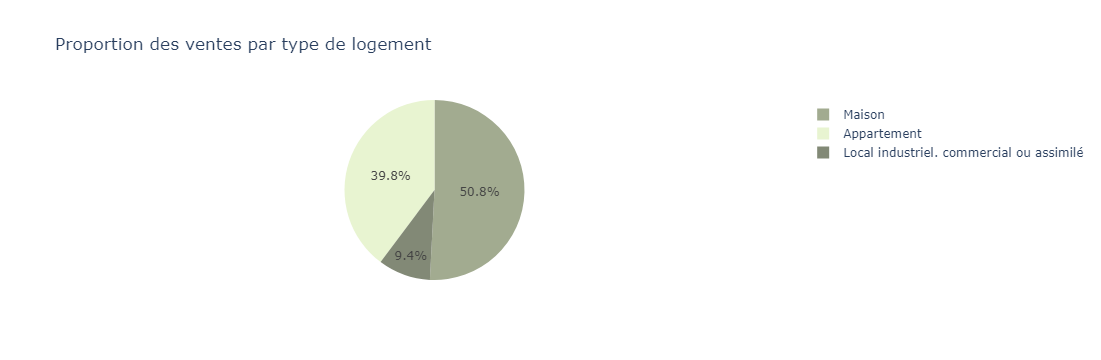

In [403]:
data = {
    'Type_logement': ['Maison', 'Appartement', 'Local industriel. commercial ou assimilé'],
    'Nombre_logements': [747946, 585515, 138364]
}
df = pd.DataFrame(data)

colors = ['#a2ab90', '#e8f4d1', '#828976']

fig = px.pie(df, values='Nombre_logements', names='Type_logement', title='Proportion des ventes par type de logement', color_discrete_sequence=colors)
fig.show()

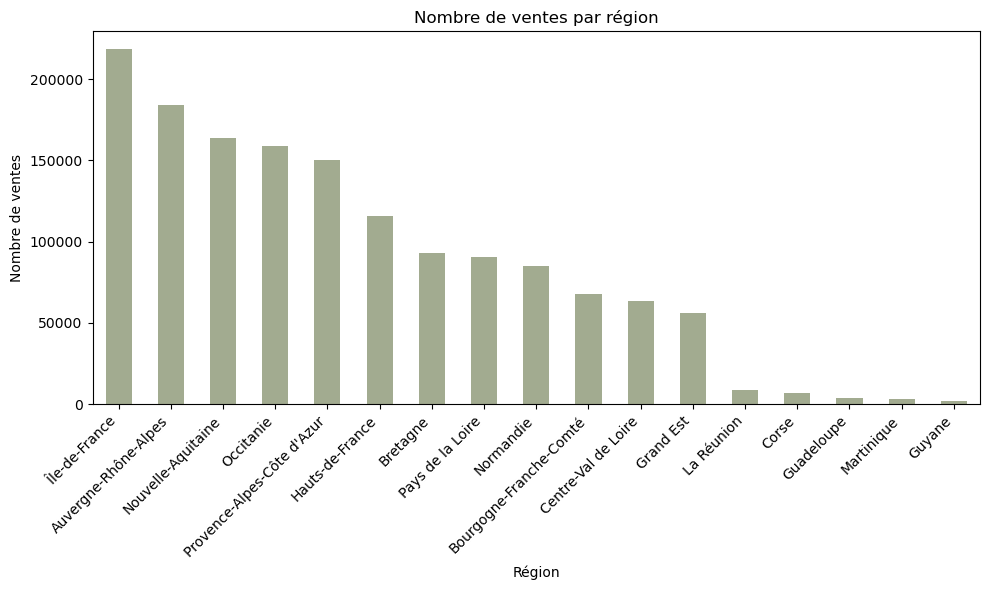

In [402]:
ventes_par_region = transac_immo['Regions'].value_counts()

plt.figure(figsize=(10, 6))

ventes_par_region.plot(kind='bar', color='#a2ab90')

plt.title('Nombre de ventes par région')
plt.xlabel('Région')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

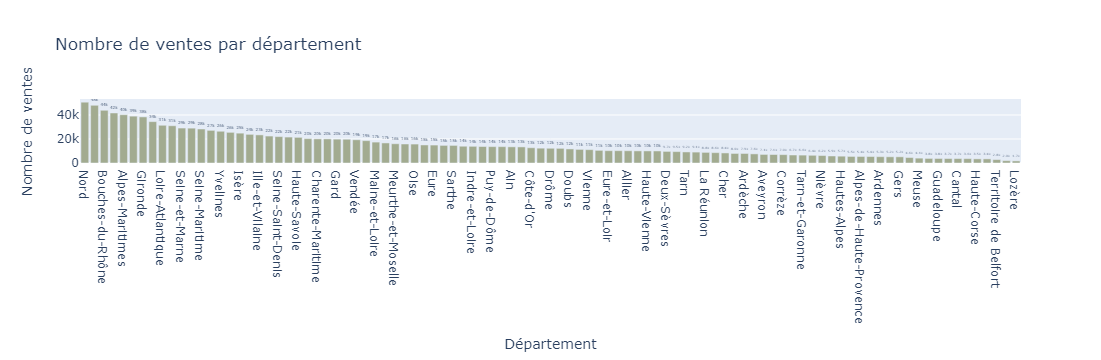

In [404]:
ventes_par_departement = transac_immo['Département'].value_counts().reset_index()
ventes_par_departement.columns = ['Département', 'Nombre de ventes']

fig = px.bar(ventes_par_departement, y='Nombre de ventes', x='Département', text='Nombre de ventes',
              title="Nombre de ventes par département", color_discrete_sequence=['#a2ab90'])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

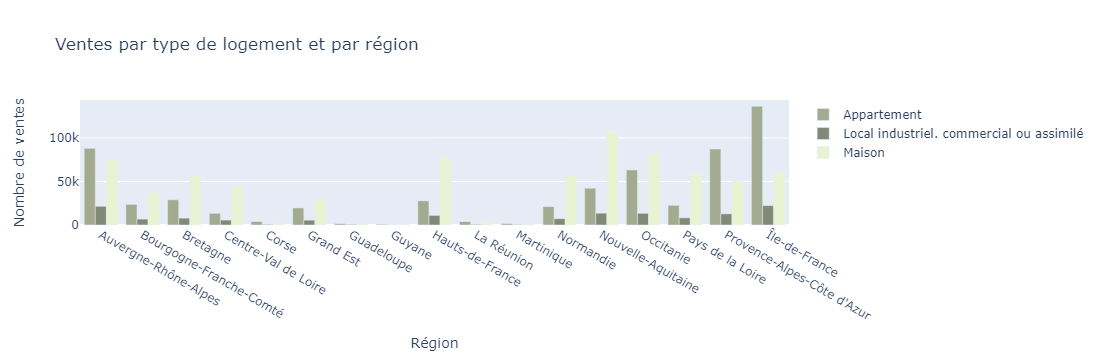

In [406]:
fig = make_subplots(rows=1, cols=1)
df = transac_immo[['Regions', 'Type_local']]
ventes_par_region_type_logement = df.groupby(['Regions', 'Type_local']).size().reset_index(name='Nombre de ventes')

couleurs = {'Appartement': '#a2ab90', 'Maison': '#e8f4d1', 'Local industriel. commercial ou assimilé': '#828976'}

for type_local in ventes_par_region_type_logement['Type_local'].unique():
    data = ventes_par_region_type_logement[ventes_par_region_type_logement['Type_local'] == type_local]
    fig.add_trace(go.Bar(x=data['Regions'], y=data['Nombre de ventes'], name=type_local, marker_color=couleurs[type_local]))

fig.update_layout(title='Ventes par type de logement et par région',
                  xaxis_title='Région',
                  yaxis_title='Nombre de ventes')
fig.show()

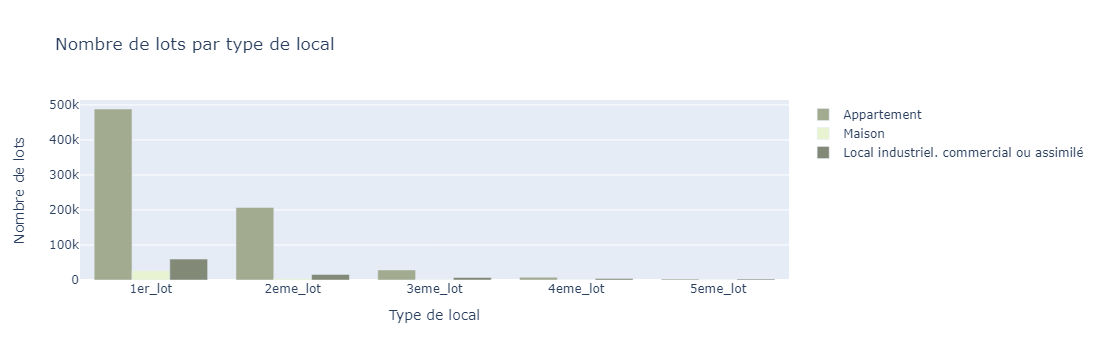

In [407]:
fig = make_subplots(rows=1, cols=1)

chiffres_par_lot = {
    '1er_lot': {
        'Appartement': 488270,
        'Local industriel. commercial ou assimilé': 59665,
        'Maison': 26088
    },
    '2eme_lot': {
        'Appartement': 207336,
        'Local industriel. commercial ou assimilé': 15969,
        'Maison': 4010
    },
    '3eme_lot': {
        'Appartement': 28788,
        'Local industriel. commercial ou assimilé': 7291,
        'Maison': 1595
    },
    '4eme_lot': {
        'Appartement': 8013,
        'Local industriel. commercial ou assimilé': 4132,
        'Maison': 727
    },
    '5eme_lot': {
        'Appartement': 2966,
        'Local industriel. commercial ou assimilé': 2699,
        'Maison': 398
    }
}

types_local_legende = ['Appartement', 'Maison', 'Local industriel. commercial ou assimilé']
couleurs = {'Appartement': '#a2ab90', 'Maison': '#e8f4d1', 'Local industriel. commercial ou assimilé': '#828976'}

for type_local in types_local_legende:
    chiffres = {lot: nombre_lot[type_local] for lot, nombre_lot in chiffres_par_lot.items()}
    fig.add_trace(go.Bar(x=list(chiffres.keys()), y=list(chiffres.values()), name=type_local, marker_color=couleurs[type_local]))

titre = 'Nombre de lots par type de local'
fig.update_layout(title=titre,
                  xaxis_title='Type de local',
                  yaxis_title='Nombre de lots')
fig.show()

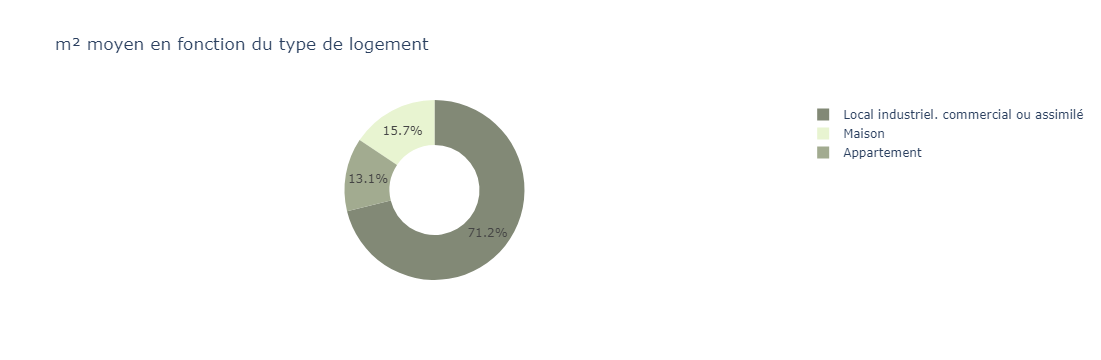

In [422]:
couleurs = {'Appartement': '#a2ab90', 'Maison': '#e8f4d1', 'Local industriel. commercial ou assimilé': '#828976'}
moyenne_surface_par_type_local = transac_immo_surface.groupby('Type_local')['Surface_global'].mean().round(2).reset_index()

df_couleurs = pd.DataFrame({'Type_local': moyenne_surface_par_type_local['Type_local'].unique()})
df_couleurs['couleur'] = df_couleurs['Type_local'].map(couleurs)

fig = px.pie(moyenne_surface_par_type_local, values='Surface_global', names='Type_local', 
             title='m² moyen en fonction du type de logement',
             color='Type_local', color_discrete_map=df_couleurs.set_index('Type_local')['couleur'],
             hole=0.5)
fig.show()

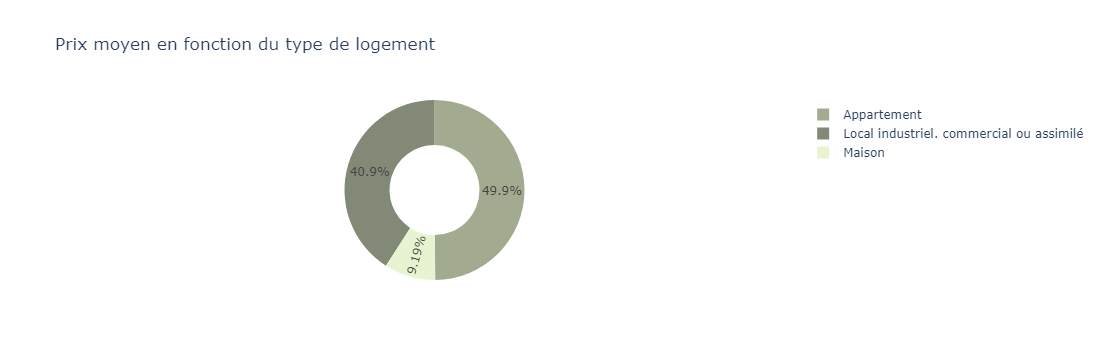

In [421]:
couleurs = {'Appartement': '#a2ab90', 'Maison': '#e8f4d1', 'Local industriel. commercial ou assimilé': '#828976'}

transac_immo_surface['Valeur_fonciere'] = transac_immo_surface['Valeur_fonciere'].str.replace(',', '.').astype(float)

prix_moyen_par_type_local = transac_immo_surface.groupby('Type_local')['Valeur_fonciere'].mean().round(2).reset_index()

df_couleurs_prix = pd.DataFrame({'Type_local': prix_moyen_par_type_local['Type_local'].unique()})
df_couleurs_prix['couleur'] = df_couleurs_prix['Type_local'].map(couleurs)

fig = px.pie(prix_moyen_par_type_local, values='Valeur_fonciere', names='Type_local', 
             title='Prix moyen en fonction du type de logement',
             color='Type_local', color_discrete_map=df_couleurs_prix.set_index('Type_local')['couleur'],
             hole=0.5)
fig.show()

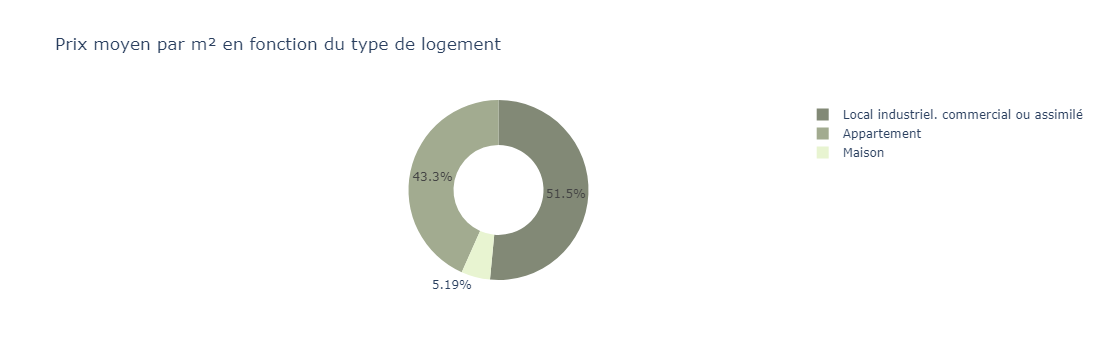

In [431]:
couleurs = {'Appartement': '#a2ab90', 'Maison': '#e8f4d1', 'Local industriel. commercial ou assimilé': '#828976'}

prix_moyen_par_m2 = {'Appartement': 54210.53, 'Maison': 6499.88, 'Local industriel. commercial ou assimilé': 64485.11}

df = pd.DataFrame(list(prix_moyen_par_m2.items()), columns=['Type_local', 'Prix_moyen_m2'])

fig = px.pie(df, values='Prix_moyen_m2', names='Type_local', 
             title='Prix moyen par m² en fonction du type de logement',
             hole=0.5, color='Type_local', color_discrete_map=couleurs)

fig.show()

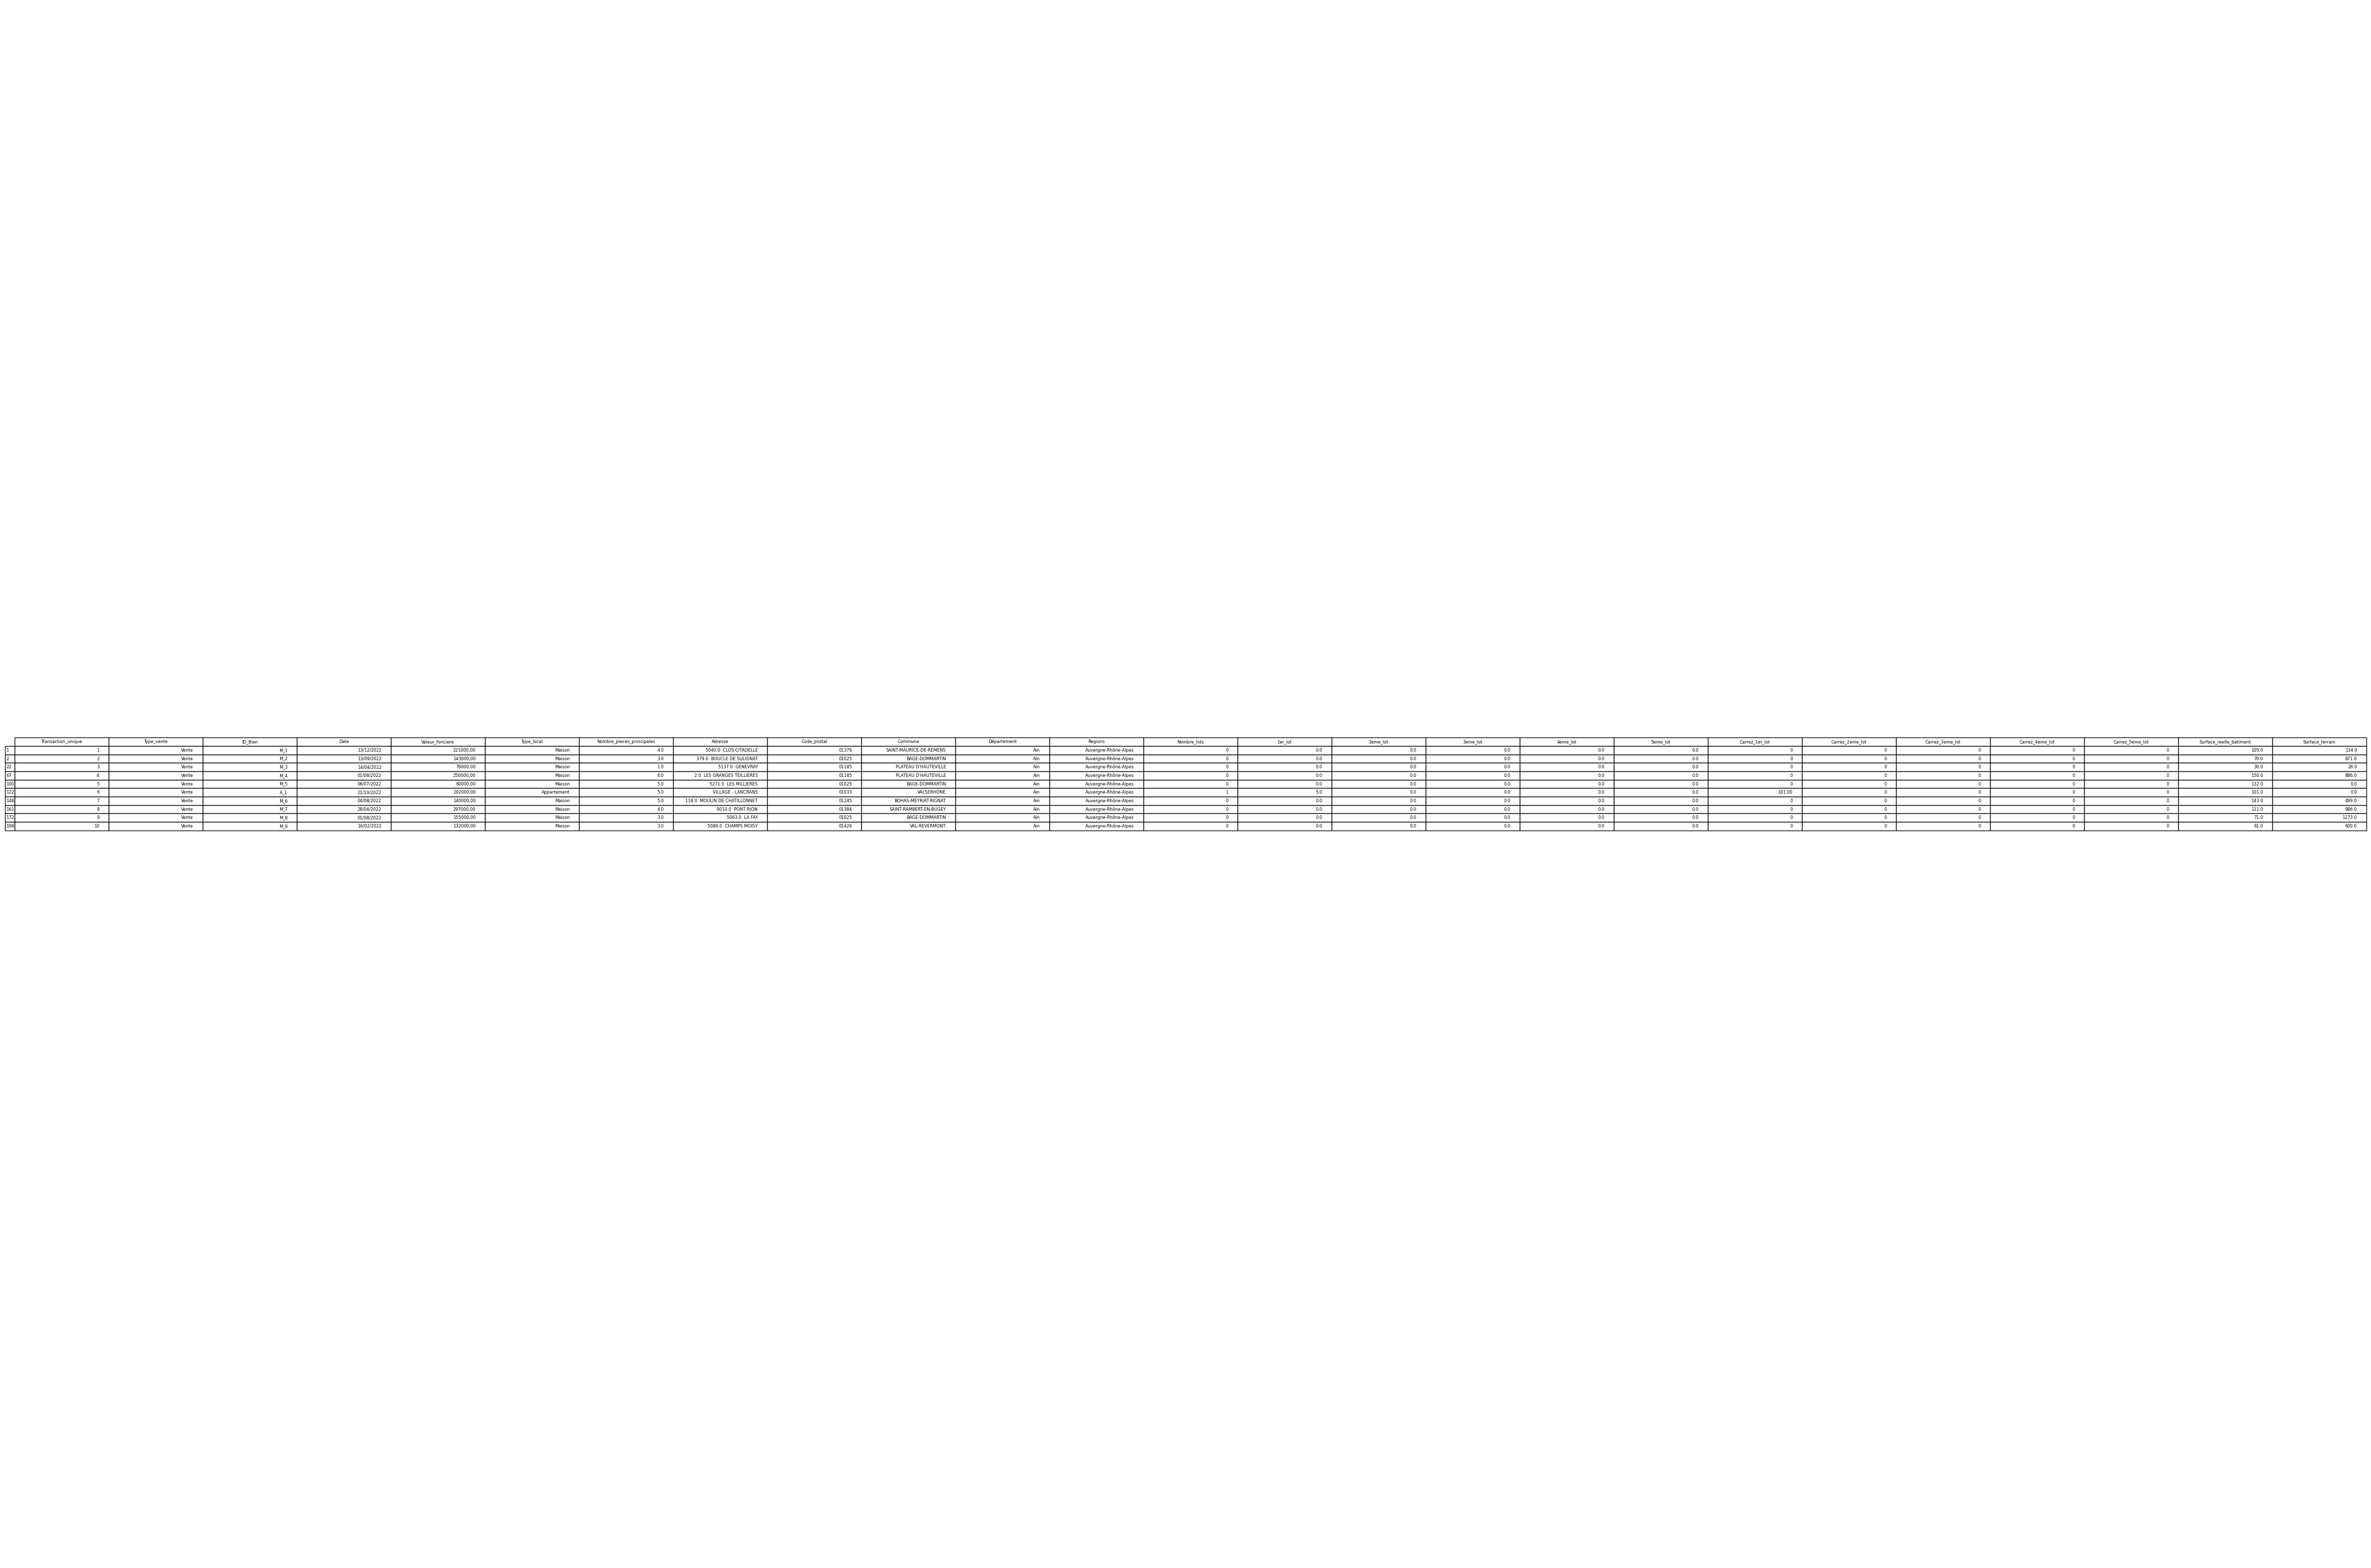

In [442]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélectionner les 20 premières lignes du DataFrame
transac_immo_subset = transac_immo.head(10)

# Création d'une nouvelle figure
plt.figure(figsize=(60, 40))

# Affichage du tableau tabulaire
ax = plt.subplot(111, frame_on=False) # Aucun cadre autour du tableau
ax.xaxis.set_visible(False)  # Masquer les étiquettes de l'axe x
ax.yaxis.set_visible(False)  # Masquer les étiquettes de l'axe y

# Utilisation de la fonction table de pandas pour afficher le DataFrame
pd.plotting.table(ax, transac_immo_subset, loc='center')

# Enregistrer le tableau en tant qu'image PNG
plt.savefig('apercu_transac_immo.png', bbox_inches='tight', pad_inches=0.1)  # bbox_inches='tight' pour éviter que les marges soient trop grandes

# Afficher le tableau si nécessaire
plt.show()


### Détection des valeurs aberrantes

Règle des 3 écarts-types

In [393]:
import numpy as np

# Calcul de la moyenne et de l'écart-type
mean = transac_immo_valeur['Valeur_fonciere'].mean()
std_dev = transac_immo_valeur['Valeur_fonciere'].std()

# Détermination des bornes supérieure et inférieure
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Compter le nombre de valeurs aberrantes détectées
nb_outliers_3std = outliers.shape[0]
print("Nombre de valeurs aberrantes détectées avec la méthode des 3 écarts-types :", nb_outliers_3std)
print('\n')

# Filtrage des valeurs aberrantes
outliers = transac_immo_valeur[(transac_immo_valeur['Valeur_fonciere'] < lower_bound) | (transac_immo_valeur['Valeur_fonciere'] > upper_bound)]
display(outliers)

Nombre de valeurs aberrantes détectées avec la méthode des 3 écarts-types : 6508




,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
42152,10505,Vente,L_1095,27/06/2022,64800000.0,Local industriel. commercial ou assimilé,0.0,51.0 IMP DES COMMUNAUX,01322,REYRIEUX,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37521.0,7718.0
225855,78042,Vente,M_31265,14/10/2022,85000000.0,Maison,7.0,12.0 CHE DE SAINT HOSPICE,06121,SAINT-JEAN-CAP-FERRAT,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,263.0,3942.0
225856,78043,Vente,M_31266,14/10/2022,85000000.0,Maison,7.0,12.0 CHE DE SAINT HOSPICE,06121,SAINT-JEAN-CAP-FERRAT,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,263.0,979.0
225859,78044,Vente,M_31267,14/10/2022,85000000.0,Maison,6.0,10.0 CHE DE SAINT HOSPICE,06121,SAINT-JEAN-CAP-FERRAT,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,110.0,6676.0
225861,78045,Vente,M_31268,14/10/2022,85000000.0,Maison,16.0,10.0 CHE DE SAINT HOSPICE,06121,SAINT-JEAN-CAP-FERRAT,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,850.0,6676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099791,1403709,Vente en l'état futur d'achèvement,L_132068,10/05/2022,102240000.0,Local industriel. commercial ou assimilé,0.0,27.0 RUE CUVIER,93048,MONTREUIL,Seine-Saint-Denis,Île-de-France,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,751.0,4041.0
4099793,1403711,Vente en l'état futur d'achèvement,L_132070,10/05/2022,102240000.0,Local industriel. commercial ou assimilé,0.0,27.0 RUE CUVIER,93048,MONTREUIL,Seine-Saint-Denis,Île-de-France,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3743.0,4041.0
4111408,1408804,Vente,L_132473,14/12/2022,111900000.0,Local industriel. commercial ou assimilé,0.0,23.0 RUE DES BATELIERS,93070,SAINT-OUEN-SUR-SEINE,Seine-Saint-Denis,Île-de-France,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,15658.0,4050.0
4159146,1428168,Vente,L_133984,10/05/2022,189324992.0,Local industriel. commercial ou assimilé,0.0,34.0 RUE LOUIS ARMAND,94078,VILLENEUVE-SAINT-GEORGES,Val-de-Marne,Île-de-France,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,50714.0,116012.0


Intervalle Interquartile

In [395]:
# Calcul de l'IQR
Q1 = transac_immo_valeur['Valeur_fonciere'].quantile(0.25)
Q3 = transac_immo_valeur['Valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1

# Détermination des bornes supérieure et inférieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Compter le nombre de valeurs aberrantes détectées
nb_outliers_IQR = outliers.shape[0]
print("Nombre de valeurs aberrantes détectées avec la méthode de l'IQR :", nb_outliers_IQR)
print('\n')
# Filtrage des valeurs aberrantes
outliers = transac_immo_valeur[(transac_immo_valeur['Valeur_fonciere'] < lower_bound) | (transac_immo_valeur['Valeur_fonciere'] > upper_bound)]
display(outliers)

Nombre de valeurs aberrantes détectées avec la méthode de l'IQR : 132744




,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,Département,Regions,Nombre_lots,1er_lot,2eme_lot,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
249,12,Vente,L_1,01/02/2022,1300000.0,Local industriel. commercial ou assimilé,0.0,6280.0 EN CHANEIN,01320,REPLONGES,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,591.0,1841.0
638,27,Vente,L_5,30/06/2022,2700000.0,Local industriel. commercial ou assimilé,0.0,5595.0 ZONE INDUSTR LA PLAINE,01192,IZERNORE,Ain,Auvergne-Rhône-Alpes,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,6035.0,7089.0
918,41,Vente,L_7,04/11/2022,13000000.0,Local industriel. commercial ou assimilé,0.0,45.0 LA NEUVE OUEST,01451,VIRIAT,Ain,Auvergne-Rhône-Alpes,1,6.0,0.0,0.0,0.0,0.0,51.0,NaN,NaN,NaN,NaN,80.0,0.0
924,42,Vente,L_8,04/11/2022,13000000.0,Local industriel. commercial ou assimilé,0.0,45.0 LA NEUVE OUEST,01451,VIRIAT,Ain,Auvergne-Rhône-Alpes,1,7.0,0.0,0.0,0.0,0.0,239.0,NaN,NaN,NaN,NaN,301.0,0.0
925,43,Vente,L_9,04/11/2022,13000000.0,Local industriel. commercial ou assimilé,0.0,44.0 LA NEUVE OUEST,01451,VIRIAT,Ain,Auvergne-Rhône-Alpes,1,2.0,0.0,0.0,0.0,0.0,715.0,NaN,NaN,NaN,NaN,546.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260000,1471684,Vente,M_747868,29/07/2022,795000.0,Maison,5.0,42.0 RUE ANDRE LETOULLEC,974008,LA POSSESSION,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,137.0,680.0
4260213,1471796,Vente,L_138363,22/08/2022,1461000.0,Local industriel. commercial ou assimilé,0.0,79.0 RUE AMIRAL LACAZE,974016,SAINT PIERRE,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,173.0,416.0
4260215,1471797,Vente,M_747922,22/08/2022,1461000.0,Maison,4.0,79.0 RUE AMIRAL LACAZE,974016,SAINT PIERRE,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,92.0,416.0
4260216,1471798,Vente,M_747923,26/09/2022,772100.0,Maison,5.0,18.0 CHE DES ANANAS,974001,LES AVIRONS,La Réunion,La Réunion,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,166.0,990.0
